In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
#Read in whales data
whale_df = pd.read_csv("data/whales.csv")

#Turn Date into datetime:
whale_df['timestamp'] = pd.to_datetime(whale_df.timestamp)
# whale_df.dtypes

In [3]:
#only get some columns then we will name them to be easier to reference:
whale_small = whale_df[['timestamp', 'location-long',	'location-lat', 'individual-local-identifier']]
whale_small = whale_small.rename(columns={"timestamp": "time", "location-lat": "lat", "location-long": "long", "individual-local-identifier": "id"})
whale_small.head()

,time,long,lat,id
0,1993-08-29 01:13:00,-122.433,37.058,1993CA-Bmu-00834
1,1993-08-28 18:20:00,-122.412,37.012,1993CA-Bmu-10823
2,1993-08-28 18:54:00,-122.415,37.022,1993CA-Bmu-10833
3,1993-08-31 23:40:00,-122.773,37.198,1993CA-Bmu-10836
4,1994-09-13 21:28:00,-123.102,37.687,1994CA-Bmu-10820


In [4]:
# see if we have nans -> Nope okay!
# whale_small = whale_small[whale_small['long'] < 0]

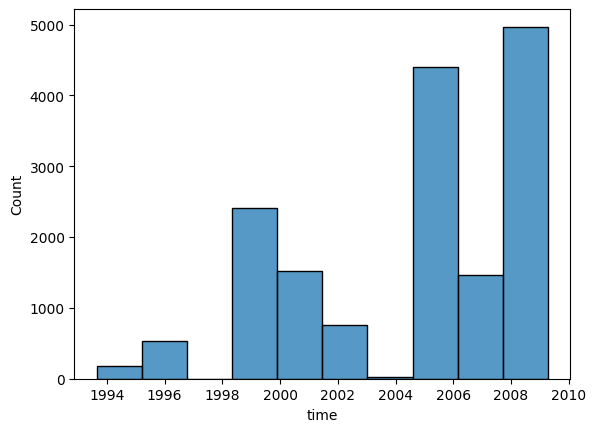

In [5]:
#lets look at the distribution of data throughout time:
sns.histplot(whale_small['time'], bins=10);

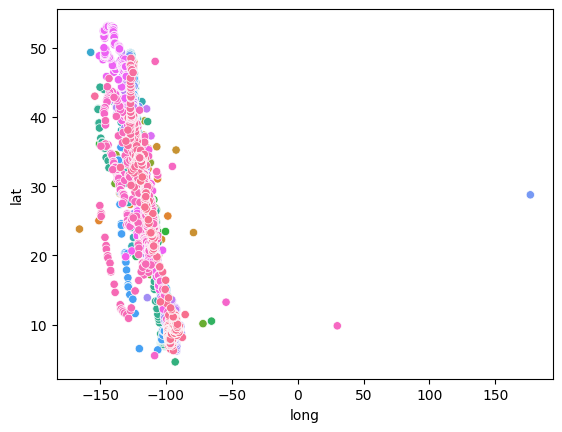

In [6]:
sns.scatterplot(data=whale_small, y="lat", x="long", hue="id", legend=False);

In [7]:
#define range of lat/long for temperature data:
min_long = np.min(whale_small['long'])
min_lat = np.min(whale_small['lat'])

max_lat = np.max(whale_small['lat'])
max_long = np.max(whale_small['long'])

In [10]:
extent = pd.DataFrame({'Type': ['Lat', 'long'], 'min': [min_lat, min_long],
                   'max': [max_lat, max_long]})
extent.to_csv('extent.csv')  

In [13]:
pd.read_csv('extent.csv').reset_index()

,index,Unnamed: 0,Type,min,max
0,0,0,Lat,4.606,53.148
1,1,1,long,-165.662,176.676
